# $\underline{\text{Practice Session : Cost-sensitive classification and ROC/PR curves}}$
##### Arnaud Capitan

## $\underline{\text{Part 1 : Evaluation metrics for binary classification}}$

### 1. Introducing ROC curves

$\underline{\textit{(1) Recall the definition of Accuracy (and prediction error) using the previous expression}}$

Accuracy = $\frac{\text{TP + TN}}{\text{TP + FP + TN + FN}}$

Error = 1 - Accuracy = $\frac{\text{FP + FN}}{\text{TP + FP + TN + FN}}$

$\underline{\textit{(2) Give at least one example when Accuracy is misleading}}$

We take a data sample with 99% label + and 1% label -
We assign every data point to the + label as a classifier, we get a 99% accuracy

### True Positive Rate (TPR) and False Positive Rate (FPR)

TPR = $\frac{\text{TP}}{\text{TP + FN}}$

FPR = $\frac{\text{FP}}{\text{FP + TN}}$

#### $\underline{\text{AUC ROC : Area Under the Curve - Receiver Operating Characteristic}}$

$\underline{\text{The ROC curve plots FPR on x's axis and TPR on y's axis for different values of threshold } \theta}$

TPR = 0
FPR will have a low value.

### $\underline{\text{Part 2. Introducing PR curves}}$

##### $\underline{\text{Definitions :}}$

Precision = $\frac{\text{TP}}{\text{TP+FP}}$

Recall = $\frac{\text{TP}}{\text{TP+FN}}$

AUC PR : Area Under the Precision-Recall Curve

AUC PR = 1.0, perfect precision and recall
AUC PR = 0, the model performs poorly

$\underline{\textit{(a) Compare the definitions of Accuracy and Precision}}$

Precision = $\frac{\text{TP}}{\text{TP+FP}}$

Accuracy = $\frac{\text{TP + TN}}{\text{TP + FP + TN + FN}}$

Precision only accounts for correclty classifying the positive class, whereas accuracy accounts for both positive and negative class

$\underline{\textit{(b) Draw a 1D example with a few data points, with a simple linear classifier (cut-point) and discuss/draw the AUC ROC and AUC PR.}}$
$\textit{First use balanced classes (same amount of positive and negative examples)}$

We will use as linear classifier $\textbf{1}_{X[k] \leq t}$ for $t \in [-1,1]$

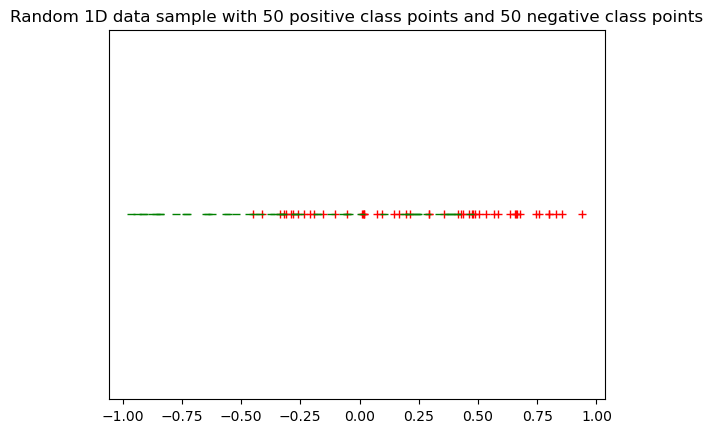

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n_pos = 50
n_neg = 50

X_pos = list(np.random.uniform(-0.5,1,n_pos))
X_neg = list(np.random.uniform(-1,0.5,n_neg))

plt.plot(X_pos, [0 for i in range (len(X_pos))], linestyle = 'none', marker='+', color='red')
plt.plot(X_neg, [0 for i in range (len(X_neg))], linestyle = 'none', marker='_', color='green')
plt.yticks([])
plt.title(f"Random 1D data sample with {n_pos} positive class points and {n_neg} negative class points")
plt.show()

The ROC curve plots FPR on x's axis and TPR on y's axis for different values of threshold $\theta$

The PR curve plots Recall on x's axis and Precision on y's axis for different values of threshold $\theta$

$\underline{\text{NB: Recall = TPR = Sensitivity}}$

In [ ]:
N_threshold = 1000 # Number of theta values
theta_values = list(np.linspace(-1,1,N_threshold))

def true_positive(theta,X_pos,X_neg):
    k = 0
    for x in X_pos:
        if x >= theta:
            k+=1
    return(k)

def false_positive(theta,X_pos,X_neg):
    k = 0
    for x in X_neg:
        if x >= theta:
            k+=1
    return(k)

def true_negative(theta,X_pos,X_neg):
    k = 0
    for x in X_neg:
        if x < theta:
            k+=1
    return(k)

def false_negative(theta,X_pos,X_neg):
    k = 0
    for x in X_pos:
        if x < theta:
            k+=1
    return(k)

def true_positive_rate(theta,X_pos,X_neg): # Or recall or sensitivity
    TP = true_positive(theta,X_pos,X_neg)
    FN = false_negative(theta,X_pos,X_neg)
    return(TP/(TP+FN))

def false_positive_rate(theta,X_pos,X_neg):
    FP = false_positive(theta,X_pos,X_neg)
    TN = true_negative(theta,X_pos,X_neg)
    return(FP/(FP+TN))

def precision(theta,X_pos,X_neg):
    TP = true_positive(theta,X_pos,X_neg)
    FP = false_positive(theta,X_pos,X_neg)
    return(TP/(FP+TP))


X_ROC = []
Y_ROC = []
X_PR = []
Y_PR = []